Compute the Jacobian of Equations 15 and 16
==

In [1]:
from __future__ import division

In [23]:
import sympy
sympy.init_printing()
x_1, x_2, x, X = sympy.symbols('x_1, x_2, x, X')
x_1

In [24]:
f1 = 20. + ([(x**2 - 10. * np.cos(2. * np.pi * x)) for x in X])
f1

TypeError: 'Symbol' object is not iterable

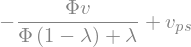

In [25]:
f2 = v_ps - (Phi * v)/(lambd + (1 - lambd) * Phi)
f2

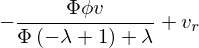

In [19]:
f3 = v_r - (phi * Phi * v)/(lambd + (1 - lambd) * Phi)
f3

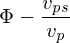

In [21]:
f4 = Phi - v_ps/v_p
f4

In [31]:
sympy.solve([f1, f2, f3, f4], [v_p, v_ps, v_r, Phi])

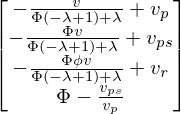

In [29]:
F = sympy.Matrix([f1,f2, f3, f4])
F

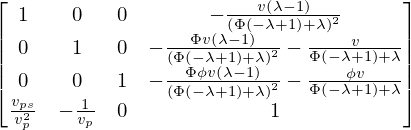

In [30]:
F.jacobian([v_p, v_ps, v_r, Phi])

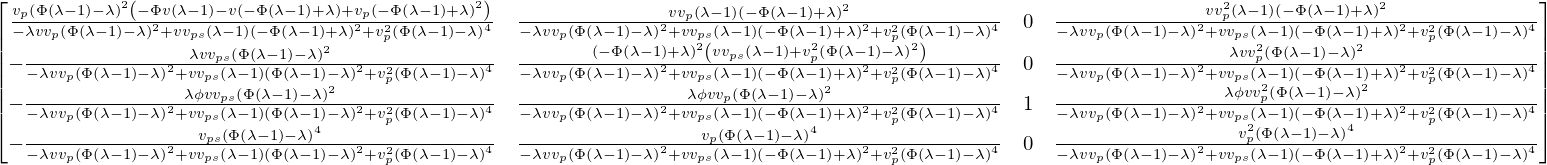

In [36]:
sympy.simplify(F.jacobian([v_p, v_ps, v_r, Phi]).inv())

In [37]:
sympy.init_printing(False)
F.jacobian([v_p, v_ps, v_r, Phi])

Matrix([
[          1,      0, 0,                                              -v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2],
[          0,      1, 0,         -Phi*v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2 - v/(Phi*(-lambda + 1) + lambda)],
[          0,      0, 1, -Phi*phi*v*(lambda - 1)/(Phi*(-lambda + 1) + lambda)**2 - phi*v/(Phi*(-lambda + 1) + lambda)],
[v_ps/v_p**2, -1/v_p, 0,                                                                                            1]])

Attempt to find an explicit expression for pressure, given the internal energy
===

In [1]:
import sympy
sympy.init_printing()
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s = sympy.symbols('e, e_p^s, e_r^s, v_p, v_ps, v_r, Phi, phi, lambda, v, phi, Gamma_p, Gamma_r, p, p_p^s, p_r^s')
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s

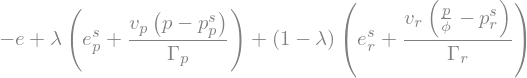

In [2]:
f1 = - e + ((1 - lambd) * (e_r_s + (v_r/gam_r) * (p/phi - p_r_s))   
            +    lambd  * (e_p_s + (v_p/gam_p) * (p - p_p_s))
            )  # = 0
f1

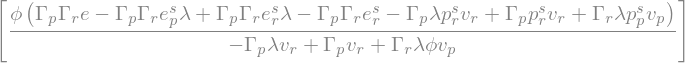

In [3]:
sympy.solve(f1, p)

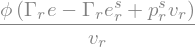

In [13]:
# NOTE: When the reaction progress is still lambd = 0, then all product terms are cancelled out:
f2 = sympy.solve(f1, p)
f2[0].subs(lambd, 0).simplify()

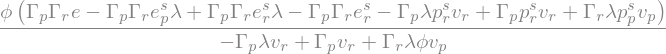

In [15]:
f3 = sympy.solve(f1, p)
f3[0].simplify()

In [75]:
sympy.init_printing(False)
sympy.solve(f1, p)

[phi*(Gamma_p*Gamma_r*e - Gamma_p*Gamma_r*e_p^s*lambda + Gamma_p*Gamma_r*e_r^s*lambda - Gamma_p*Gamma_r*e_r^s - Gamma_p*lambda*p_r^s*v_r + Gamma_p*p_r^s*v_r + Gamma_r*lambda*p_p^s*v_p)/(-Gamma_p*lambda*v_r + Gamma_p*v_r + Gamma_r*lambda*phi*v_p)]

In [16]:
sympy.init_printing(False)
f2[0].subs(lambd, 0).simplify()

phi*(Gamma_r*e - Gamma_r*e_r^s + p_r^s*v_r)/v_r

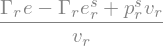

In [3]:
#TEST
f1 = - e + ((1 - lambd) * (e_r_s + (v_r/gam_r) * (p - p_r_s))   
            +    lambd  * (e_p_s + (v_p/gam_p) * (p - p_p_s))
            )  # = 0
f2 = sympy.solve(f1, p)
f2[0].subs(lambd, 0).simplify()

Find the initial energy
===

In [76]:
import sympy
sympy.init_printing()
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s, INT = sympy.symbols('e, e_p^s, e_r^s, v_p, v_ps, v_r, Phi, phi, lambda, v, phi, Gamma_p, Gamma_r, p, p_p^s, p_r^s, INT')
e, e_p_s, e_r_s, v_p, v_ps, v_r, Phi, phi, lambd, v, phi, gam_p, gam_r, p, p_p_s, p_r_s, INT

In [83]:
f2 = - e + ((1 - lambd) * ((INT + e) + (v_r/gam_r) * (p/phi - p_r_s))   
            +    lambd  * (e_p_s + (v_p/gam_p) * (p - p_p_s))
            )  # = 0
f2

-e + lambda*(e_p^s + v_p*(p - p_p^s)/Gamma_p) + (-lambda + 1)*(INT + e + v_r*(p/phi - p_r^s)/Gamma_r)

Note that lambd_0 = 0:

In [81]:
f2 = - e + (((INT + e) + (v_r/gam_r) * (p/phi - p_r_s))  
            )  # = 0
f2

INT + v_r*(p/phi - p_r^s)/Gamma_r

In [84]:
sympy.init_printing(False)
sympy.solve(f2, e)

[-INT + INT/lambda + e_p^s - p*v_r/(Gamma_r*phi) + p_r^s*v_r/Gamma_r + p*v_r/(Gamma_r*lambda*phi) - p_r^s*v_r/(Gamma_r*lambda) + p*v_p/Gamma_p - p_p^s*v_p/Gamma_p]

New approach 2020.11.28
---

Approach to compute the internal energy from the fundamental thermodynamic definition:

$$d U=C_{V} d T+\left[T\left(\frac{\partial P}{\partial T}\right)_{V}-P\right] d V$$

Where $C_{V}= 992 $ (J / kg K)



First start with the WREOS definition for Pressure when $\lambda=0$

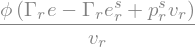

In [27]:
sympy.init_printing(1)
f2 = sympy.solve(f1, p)
f2[0].subs(lambd, 0).simplify()

In [28]:
f2[0].subs(lambd, 0).subs(v_r, phi).simplify()

$$
P(v,T) = \frac{\phi\left(\Gamma_{r}(v) e-\Gamma_{r}(v) e_{r}^{s}(v)+p_{r}^{s}(v) v_{r}\right)}{v_{r}}
$$

where $v_{r}=\phi v$

Note that at initial conditions we have:

$$e_{r}^{s}(v)=v_{0} \int_{0}^{y} p_{r}^{s}(\bar{y}) d \bar{y}+e_{0}$$

where 

$$y(v) = 1-v / v_{0} =  1-v_{0}/ v_{0} = 0$$

so the limits in the integral in the first term are:

$$v_{0} \int_{0}^{y} p_{r}^{s}(\bar{y}) d \bar{y} = v_{0} \int_{0}^{0} p_{r}^{s}(\bar{y}) d \bar{y} = 0$$

then

$$e_{r}^{s}(v)=e_{0}$$


The WREOS becomes:

$$
P_0 = P(v_0,T) = \frac{\phi\left(\Gamma_{r}(v_0) e_0-\Gamma_{r}(v_0) e_0+p_{r}^{s}(v) v_{r}\right)}{v_{r}}
$$

Next note that 
$$
\Gamma_{r}(v_{0})=\Gamma_{r}^{0}+Z y(v_{0}) = \Gamma_{r}^{0} + Z (0) = \Gamma_{r}^{0} 
$$

so

$$
P_0 = P(v_0,T) = \frac{\phi\left(\Gamma_{r}^{0} e_0-\Gamma_{r}^{0}  e_0+p_{r}^{s}(v) v_{r}\right)}{v_{r}} = \frac{\phi\left(p_{r}^{s}(v) v_{r}\right)}{v_{r}} = \phi p_{r}^{s}(v)
$$

Since $\phi p_{r}^{s}(v)$ is a function of $v$ only we have $\left(\frac{\partial P}{\partial T}\right)_{V} = 0 $

so:

$$d U=C_{V} d T+\left[T\left(\frac{\partial P}{\partial T}\right)_{V}-P\right] d V$$

becomes:

$$d U=C_{V} d T+\left[-P\right] d V$$

Now integrate from absolute zero to initial conditions:

$$\int_{e_{(T=0K)}}^{e_0} d U= \int_0^{273.15+25}C_{V} d T -  \int_{\infty}^{v_0} P(v,e) d v $$

$$ e_0 - e_{(T=0K)} =  (273.15+25) \times 992  -  \int_{\infty}^{v_0} P(v,e) d v $$

$ (273.15+25) \times 992  = 295764.8 $ (J / kg K) 

$$ e_0 - e_{(T=0K)} = 295764.8  -  \int_{\infty}^{v_0} P(v,e) d v $$


In [29]:
# Expression for pressure
f2[0].subs(lambd, 0).subs(v_r, phi).simplify()